In [1]:
import healpy as hp
import numpy as np
import prior_fcns as prior
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)
mpl.rc('image', cmap='RdBu_r')

In [3]:
NPIX = hp.nside2npix(2**6)

In [4]:
p = prior.Priors()

In [5]:
def bh_density(r, l, b, rd, zd):
    return r**2*p._disk_model(r, l, b, rd, zd)

In [6]:
abundance = np.zeros(NPIX)
for i in range(NPIX):
    l, b = hp.pix2ang(2**6, i, nest = True, lonlat = True)
    abundance[i] = integrate.quad(bh_density, 0, 5, args = (l, b, 2.6, 3))[0]
    #print(abundance)

In [7]:
norm = 1e7/np.sum(abundance)

In [8]:
def dm_density(r, l, b, rs = 18):
    return r**2*p._NFW_model(r, l, b, rs)

In [9]:
dm_abundance = np.zeros(NPIX)
for i in range(NPIX):
    l, b = hp.pix2ang(2**6, i, nest = True, lonlat = True)
    dm_abundance[i] = integrate.quad(dm_density, 0, 5, args = (l, b))[0]
    #print(abundance)

In [10]:
rho_0 = 1e7*p._NFW_model(0, 0, 0, rs = 18)

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


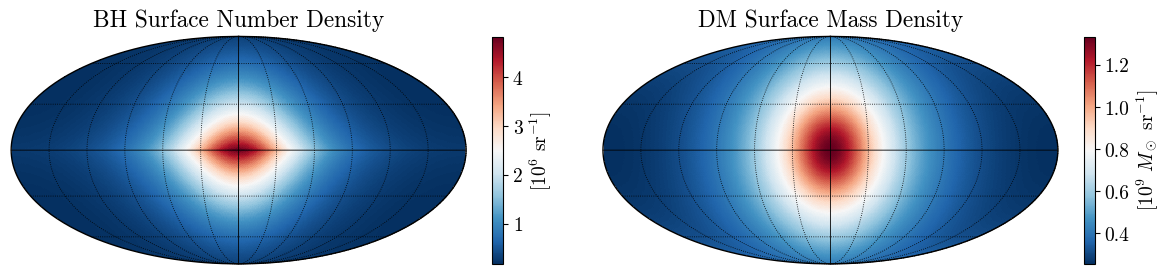

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (14,4))

plt.axes(ax1)
hp.mollview(abundance*norm/(4*np.pi/NPIX)/1e6, nest = True, cbar = False, norm = 'None',
            unit = '$sr^{-1}$', title = 'BH Surface Number Density', 
            format='%.2e', format2='%.2e', hold = True)
#hp.graticule(lw = .6, color = 'grey');
fig1 = plt.gcf()
ax = plt.gca()

image = ax.get_images()[0]
cmap = fig1.colorbar(image, ax=ax, fraction = 0.023, #shrink = .75, #anchor = (0.5, .5), 
                     label = '[$10^6$ sr$^{-1}$]')

plt.axes(ax2)
hp.mollview(dm_abundance*rho_0/1e9, nest = True, cbar = False, 
            norm = 'none',
            unit = '$M_\odot\cdot sr^{-1}$', title = 'DM Surface Mass Density', 
            format='%.2e', format2='%.2e', hold = True)
hp.graticule(lw = .6);

fig2 = plt.gcf()
ax = plt.gca()

image = ax.get_images()[0];
cmap = fig1.colorbar(image, ax=ax, fraction = 0.023, #shrink = .75, #anchor = (0.5, .5), 
                     label = '[$10^9~M_\odot$ sr$^{-1}$]');

#plt.tight_layout()

plt.savefig('BH_DM_abundance.pdf', bbox_inches='tight')